In [1]:
%matplotlib inline

In [2]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load/read csv files
city_data_df = pd.read_csv("resources/city_data.csv")
ride_data_df = pd.read_csv("resources/ride_data.csv")

In [4]:
#ride_data_df.head(10)

In [5]:
# get rows/columns that are NOT null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# get data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# get unique values of type of city
city_data_df["type"].unique()

# get # of data points per city type
n_urban = sum(city_data_df["type"] == "Urban")
n_suburb = sum(city_data_df["type"] == "Suburban")
n_rural = sum(city_data_df["type"] == "Rural")
n_rural

18

In [8]:
# get rows/columns that are NOT null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
# get data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [10]:
# merge datasets
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [11]:
# dataframes for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburb_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [12]:
# get # of rides per city
urban_ride_ct = urban_cities_df.groupby(["city"]).count()["driver_count"]
suburb_ride_ct = suburb_cities_df.groupby(["city"]).count()["driver_count"]
rural_ride_ct = rural_cities_df.groupby(["city"]).count()["driver_count"]

urban_ride_ct.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: driver_count, dtype: int64

In [13]:
# get mean fare per city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburb_avg_fare = suburb_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [14]:
# get mean # of driver per city 
urban_avg_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburb_avg_drivers = suburb_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"]

urban_avg_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

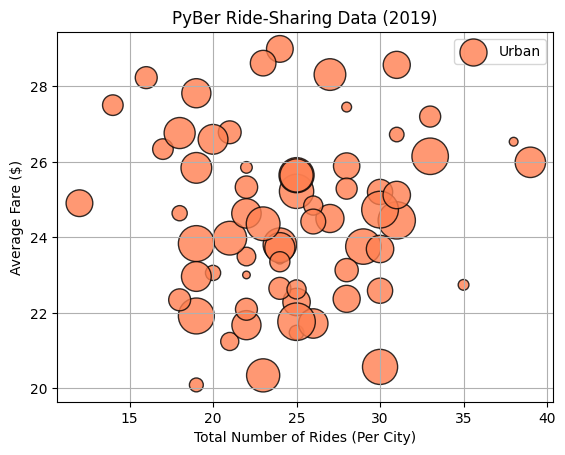

In [15]:
# urban cities bubble chart
plt.scatter(
    urban_ride_ct, urban_avg_fare,
    s=(urban_avg_drivers*10), c="coral",
    edgecolor="black", linewidth=1,
    alpha=0.8, label="Urban")

# titles/labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid(True)
plt.legend()

plt.show()

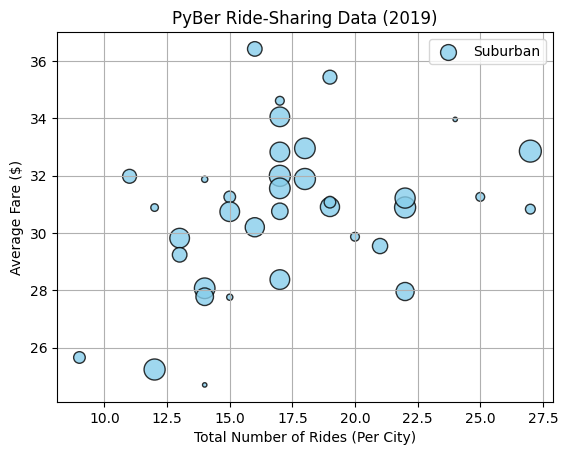

In [16]:
# suburban cities bubble chart
plt.scatter(
    suburb_ride_ct, suburb_avg_fare,
    s=(suburb_avg_drivers*10), c="skyblue",
    edgecolor="black", linewidth=1,
    alpha=0.8, label="Suburban")

# titles/labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid(True)
plt.legend()

plt.show()

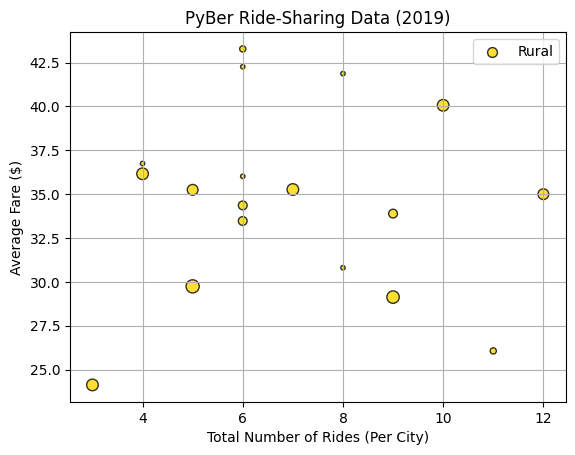

In [17]:
# rural cities bubble chart
plt.scatter(
    rural_ride_ct, rural_avg_fare,
    s=(rural_avg_drivers*10), c="gold",
    edgecolor="black", linewidth=1,
    alpha=0.8, label="Rural")

# titles/labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid(True)
plt.legend()

plt.show()

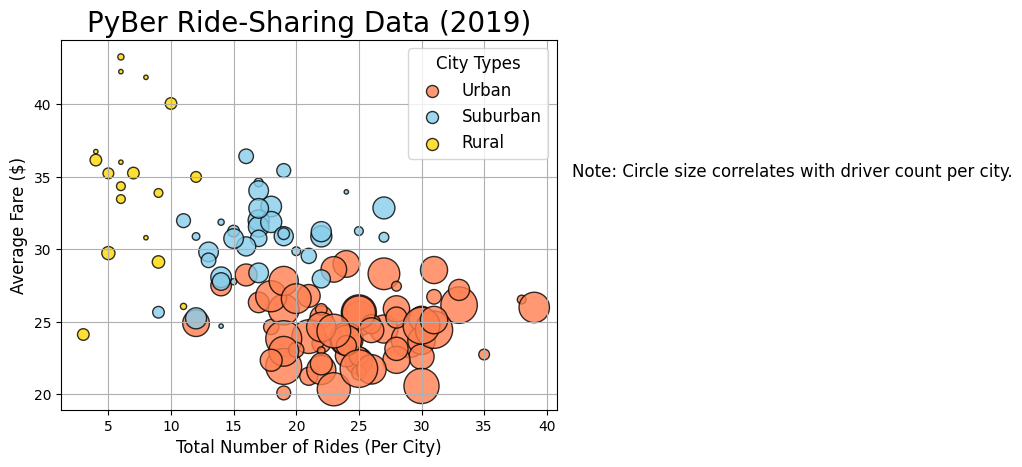

In [18]:
# combined bubble chart

# urban cities bubble chart
plt.scatter(
    urban_ride_ct, urban_avg_fare,
    s=(urban_avg_drivers*10), c="coral",
    edgecolor="black", linewidth=1,
    alpha=0.8, label="Urban")

# suburban cities bubble chart
plt.scatter(
    suburb_ride_ct, suburb_avg_fare,
    s=(suburb_avg_drivers*10), c="skyblue",
    edgecolor="black", linewidth=1,
    alpha=0.8, label="Suburban")

# rural cities bubble chart
plt.scatter(
    rural_ride_ct, rural_avg_fare,
    s=(rural_avg_drivers*10), c="gold",
    edgecolor="black", linewidth=1,
    alpha=0.8, label="Rural")

# labels/titles
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)

plt.grid(True)

# legend
legend = plt.legend(fontsize="12",
         scatterpoints=1, loc="best", title="City Types")
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]
legend.get_title().set_fontsize(12)

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize=12)

plt.savefig("analysis/fig1.png")

plt.show()

In [19]:
# summary stats for city types 1
#urban_cities_df.describe()
#suburb_cities_df.describe()
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [20]:
# summary stats for city types 2
#urban_ride_ct.describe()
#suburb_ride_ct.describe()
rural_ride_ct.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: driver_count, dtype: float64

In [21]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_ct.mean(),2), round(suburb_ride_ct.mean(),2), round(rural_ride_ct.mean(),2)

(24.62, 17.36, 6.94)

In [22]:
# Calculate the median of the ride count for each city type.
round(urban_ride_ct.median(), 2), round(suburb_ride_ct.median(), 2), round(rural_ride_ct.median(), 2)

(24.0, 17.0, 6.0)

In [23]:
# Calculate the mode of the ride count for each city type.
round(urban_ride_ct.mode(), 2), round(suburb_ride_ct.mode(), 2), round(rural_ride_ct.mode(), 2)

(0    22
 1    25
 Name: driver_count, dtype: int64,
 0    17
 Name: driver_count, dtype: int64,
 0    6
 Name: driver_count, dtype: int64)

In [24]:
import numpy as np
import scipy.stats as sts

In [25]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_ct = np.mean(urban_ride_ct)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_ct:.2f}.")

median_urban_ride_ct = np.median(urban_ride_ct)
print(f"The median for the ride counts for urban trips is {median_urban_ride_ct}.")

mode_urban_ride_ct = sts.mode(urban_ride_ct)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_ct}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


/var/folders/k6/qhkjmmkx2jz86kx07zfbrp8m0000gn/T/ipykernel_4625/2983272710.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_ride_ct = sts.mode(urban_ride_ct)


In [26]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburb_ride_ct = np.mean(suburb_ride_ct)
print(f"The mean for the ride counts for urban trips is {mean_suburb_ride_ct:.2f}.")

median_suburb_ride_ct = np.median(suburb_ride_ct)
print(f"The median for the ride counts for urban trips is {median_suburb_ride_ct}.")

mode_suburb_ride_ct = sts.mode(suburb_ride_ct)
print(f"The mode for the ride counts for urban trips is {mode_suburb_ride_ct}.")

The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17]), count=array([7])).


/var/folders/k6/qhkjmmkx2jz86kx07zfbrp8m0000gn/T/ipykernel_4625/2324390620.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_suburb_ride_ct = sts.mode(suburb_ride_ct)


In [27]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_ct = np.mean(rural_ride_ct)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_ct:.2f}.")

median_rural_ride_ct = np.median(rural_ride_ct)
print(f"The median for the ride counts for urban trips is {median_rural_ride_ct}.")

mode_rural_ride_ct = sts.mode(rural_ride_ct)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_ct}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6]), count=array([5])).


/var/folders/k6/qhkjmmkx2jz86kx07zfbrp8m0000gn/T/ipykernel_4625/1122326993.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_rural_ride_ct = sts.mode(rural_ride_ct)


In [28]:
# Get the fares for the types of cities.
urban_fares = urban_cities_df["fare"]
suburb_fares = suburb_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [29]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


/var/folders/k6/qhkjmmkx2jz86kx07zfbrp8m0000gn/T/ipykernel_4625/244280386.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_fares = sts.mode(urban_fares)


In [30]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburb_fares = np.mean(suburb_fares)
print(f"The mean fare price for urban trips is ${mean_suburb_fares:.2f}.")

median_suburb_fares = np.median(suburb_fares)
print(f"The median fare price for urban trips is ${median_suburb_fares:.2f}.")

mode_suburb_fares = sts.mode(suburb_fares)
print(f"The mode fare price for urban trips is {mode_suburb_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


/var/folders/k6/qhkjmmkx2jz86kx07zfbrp8m0000gn/T/ipykernel_4625/1905205510.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_suburb_fares = sts.mode(suburb_fares)


In [31]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


/var/folders/k6/qhkjmmkx2jz86kx07zfbrp8m0000gn/T/ipykernel_4625/651566286.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_rural_fares = sts.mode(rural_fares)


In [32]:
# Get the driver count data from each type of city
urban_drivers = urban_cities_df['driver_count']
suburb_drivers = suburb_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [33]:
# Calculate the measures of central tendency for the number of drivers in the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers in urban cities is ${mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers in urban cities is ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers in urban cities is {mode_urban_drivers}.")

The mean number of drivers in urban cities is $36.68.
The median number of drivers in urban cities is $37.00.
The mode number of drivers in urban cities is ModeResult(mode=array([39]), count=array([86])).


/var/folders/k6/qhkjmmkx2jz86kx07zfbrp8m0000gn/T/ipykernel_4625/283903818.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_drivers = sts.mode(urban_drivers)


In [34]:
# Calculate the measures of central tendency for the number of drivers in the suburb cities.
mean_suburb_drivers = np.mean(suburb_drivers)
print(f"The mean number of drivers in suburb cities is ${mean_suburb_drivers:.2f}.")

median_suburb_drivers = np.median(suburb_drivers)
print(f"The median number of drivers in suburb cities is ${median_suburb_drivers:.2f}.")

mode_suburb_drivers = sts.mode(suburb_drivers)
print(f"The mode number of drivers in suburb cities is {mode_suburb_drivers}.")

The mean number of drivers in suburb cities is $13.71.
The median number of drivers in suburb cities is $16.00.
The mode number of drivers in suburb cities is ModeResult(mode=array([20]), count=array([79])).


/var/folders/k6/qhkjmmkx2jz86kx07zfbrp8m0000gn/T/ipykernel_4625/2488715245.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_suburb_drivers = sts.mode(suburb_drivers)


In [35]:
# Calculate the measures of central tendency for the number of drivers in the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers in rural cities is ${mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers in rural cities is ${median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers in urban cities is {mode_rural_drivers}.")

The mean number of drivers in rural cities is $4.30.
The median number of drivers in rural cities is $4.00.
The mode number of drivers in urban cities is ModeResult(mode=array([1]), count=array([32])).


/var/folders/k6/qhkjmmkx2jz86kx07zfbrp8m0000gn/T/ipykernel_4625/224126251.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_rural_drivers = sts.mode(rural_drivers)


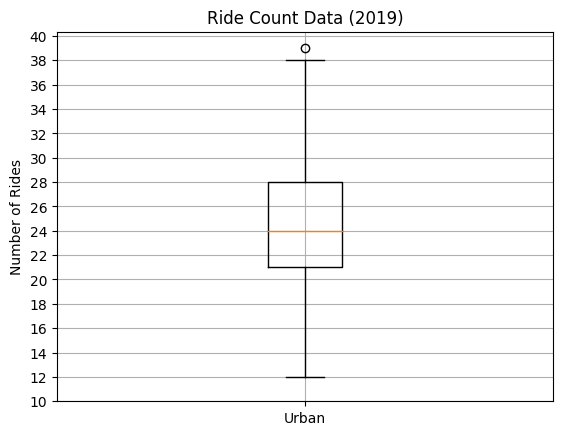

In [36]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_ct, labels=x_labels)

# titles/labels
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))

ax.grid()

plt.show()

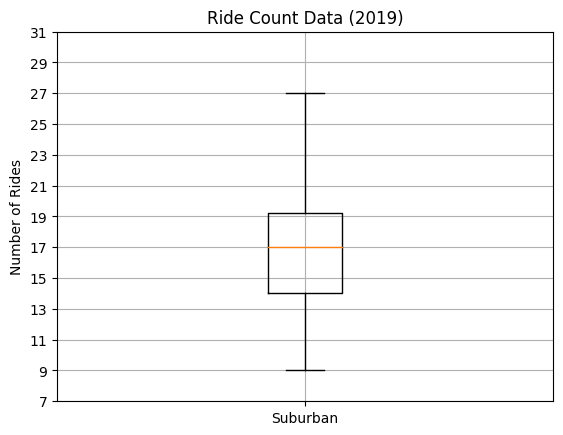

In [37]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburb_ride_ct, labels=x_labels)

# titles/labels
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(7, 33, step=2.0))

ax.grid()

plt.show()

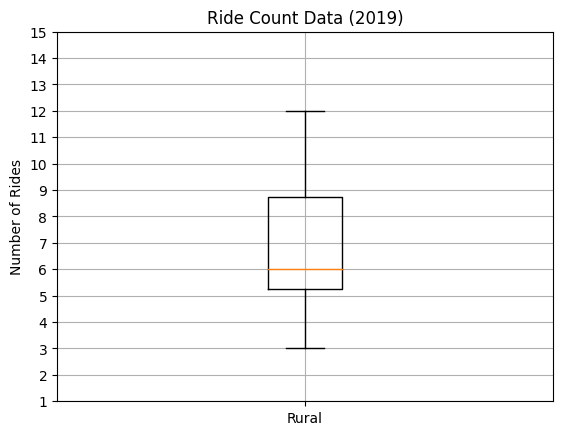

In [38]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_ct, labels=x_labels)

# titles/labels
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(1, 16, step=1.0))

ax.grid()

plt.show()

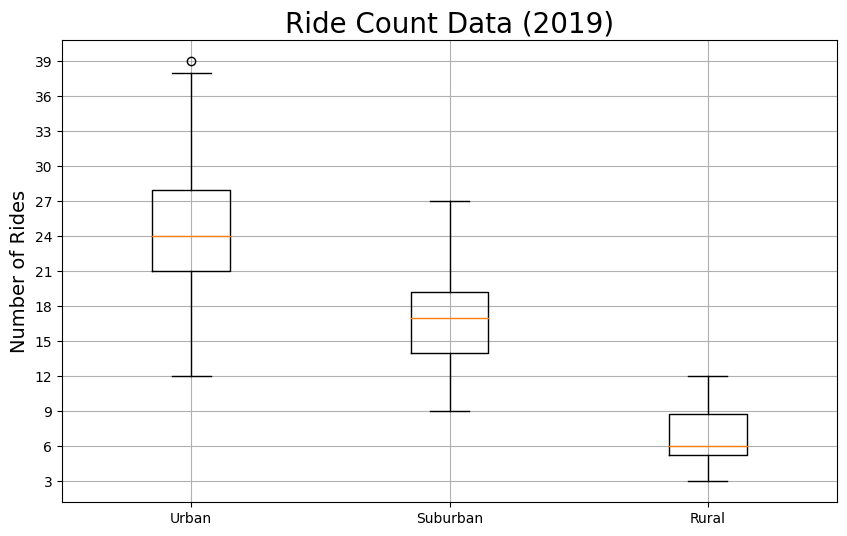

In [39]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_ct, suburb_ride_ct, rural_ride_ct]
fig, ax = plt.subplots(figsize=(10, 6))

# title/labels
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))

ax.boxplot(ride_count_data, labels=x_labels)

ax.grid()

plt.savefig("analysis/fig2.png")

plt.show()

In [40]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_ct[urban_ride_ct==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


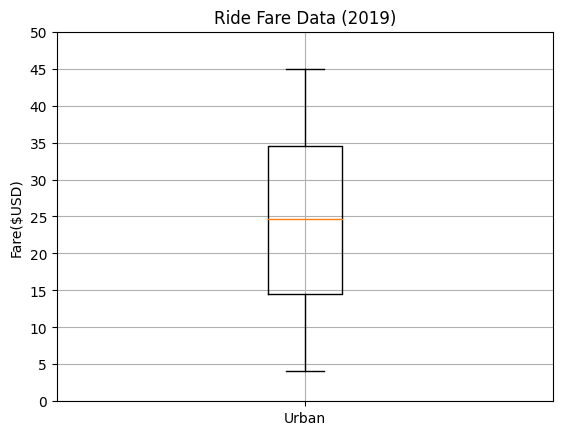

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [41]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# title/labels
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")
urban_fares.describe()

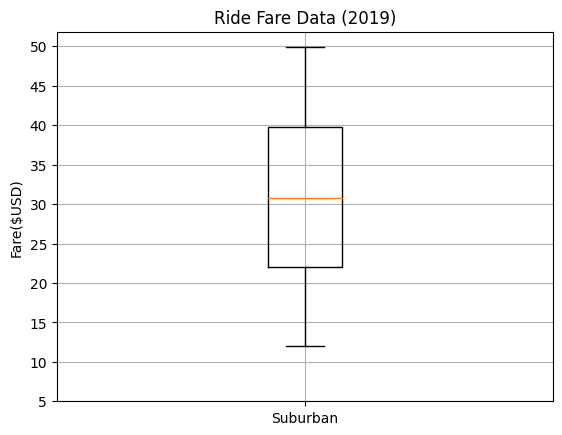

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [42]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburb_fares, labels=x_labels)

# title/labels
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 51, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")
suburb_fares.describe()

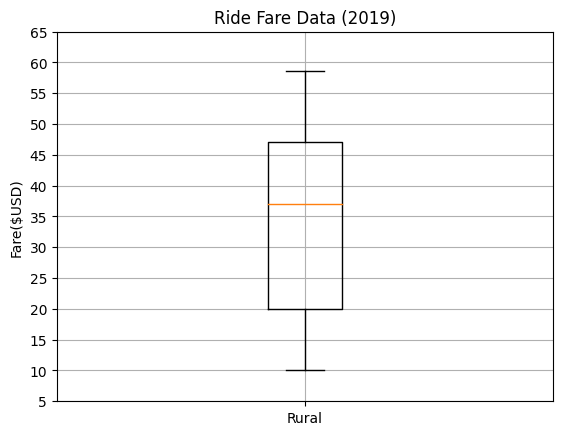

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [43]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# title/labels
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 66, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")
rural_fares.describe()

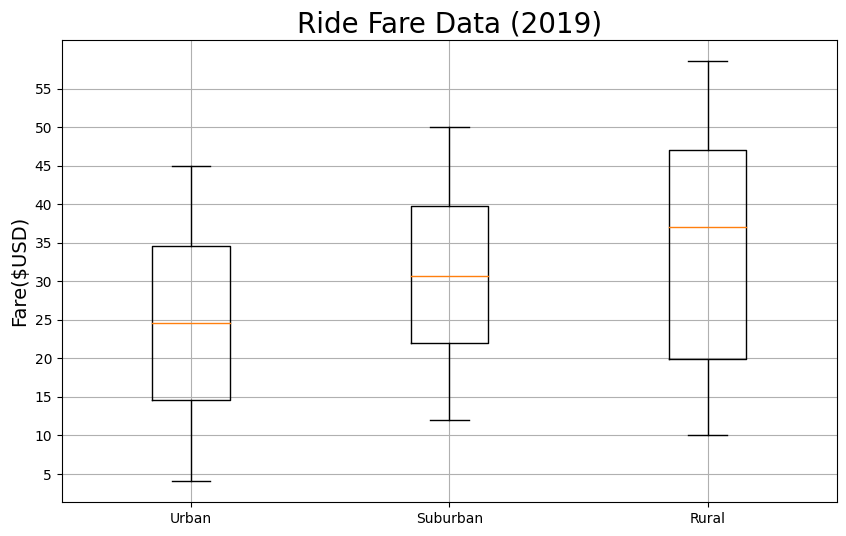

In [44]:
# Add all fare data box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fares_data = [urban_fares, suburb_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))

# title/labels
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_yticks(np.arange(0, 56, step=5.0))

ax.boxplot(fares_data, labels=x_labels)

ax.grid()

plt.savefig("analysis/fig3.png")

plt.show()

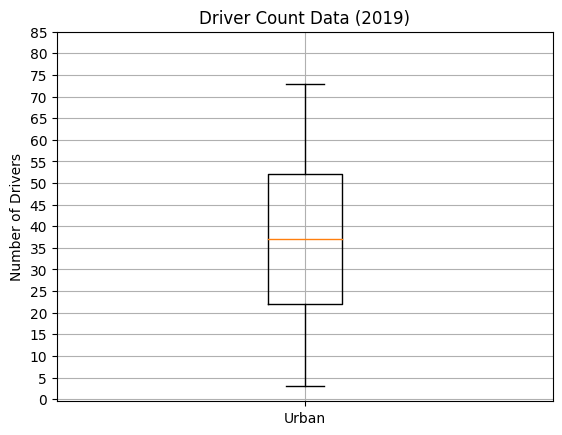

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [45]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)

# title/labels
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 86, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")
urban_drivers.describe()

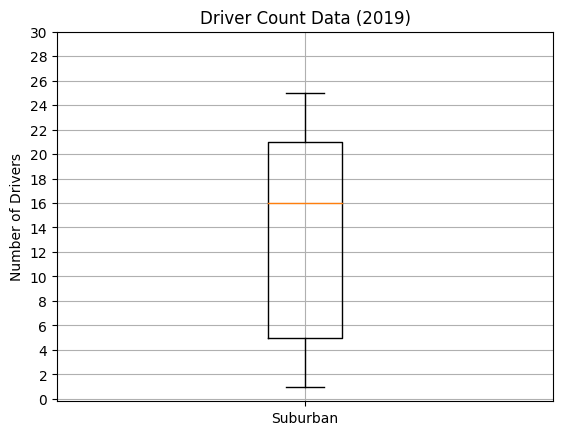

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [46]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburb_drivers,labels=x_labels)

# title/labels
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 31, step=2.0))

ax.grid()

plt.show()

print("Summary Statistics")
suburb_drivers.describe()

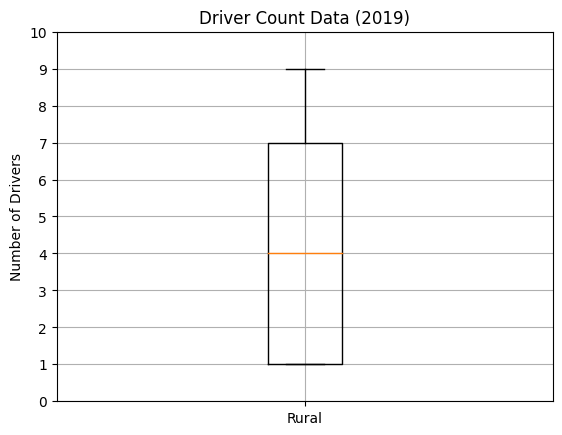

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [47]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)

# title/labels
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 11, step=1.0))

ax.grid()

plt.show()

print("Summary Statistics")
rural_drivers.describe()

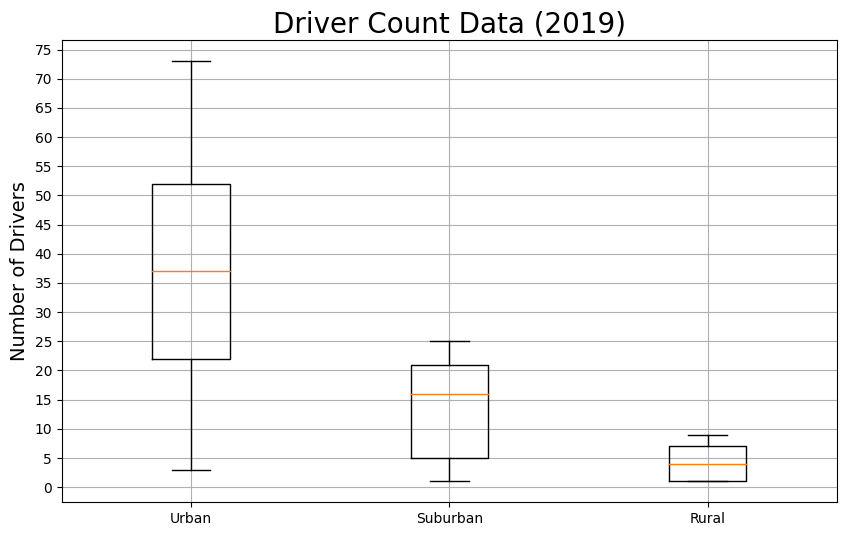

In [48]:
# Add all driver count data box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
driver_ct_data = [urban_drivers, suburb_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))

# title/labels
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_yticks(np.arange(0, 86, step=5.0))

ax.boxplot(driver_ct_data, labels=x_labels)

ax.grid()

plt.savefig("analysis/fig4.png")

plt.show()

In [49]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [50]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [51]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

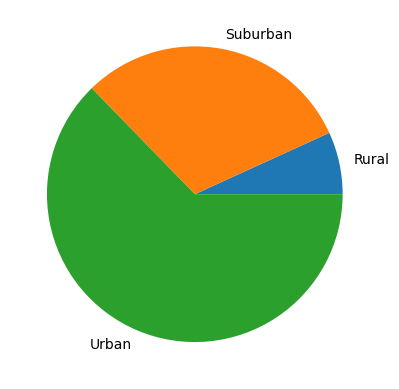

In [52]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

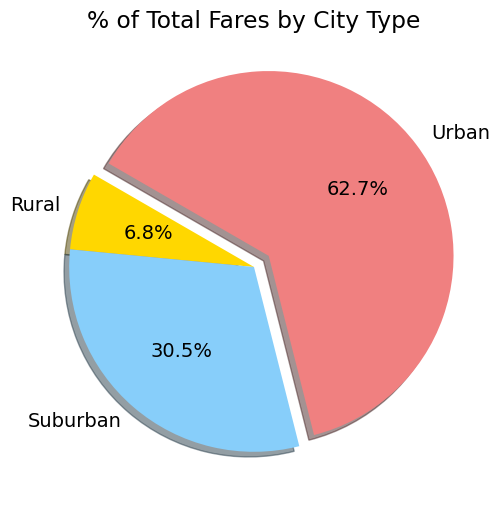

In [58]:
import matplotlib as mpl

# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")

mpl.rcParams['font.size'] = 14

plt.savefig("analysis/fig5.png")

plt.show()

In [68]:
# Calculate the percentage of the total rides for each city type
ride_percents = 100 * (pyber_data_df.groupby(["type"]).count()["ride_id"])/(pyber_data_df["ride_id"].count())
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

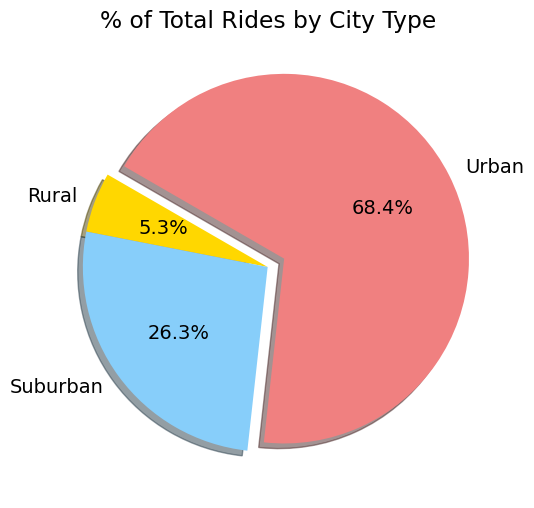

In [70]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

mpl.rcParams['font.size'] = 14

plt.savefig("analysis/fig6.png")

plt.show()

In [73]:
driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

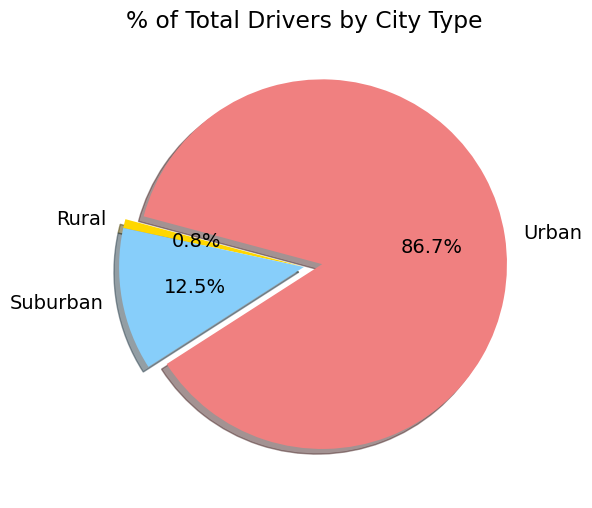

In [76]:
# Build percentage of drivers by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)

plt.title("% of Total Drivers by City Type")

mpl.rcParams['font.size'] = 14

plt.savefig("analysis/fig7.png")

plt.show()